## Burger's equation

Burger's equation is a fundamental partial differential equation in fluid dynamics. In one dimension, it can be expressed as:

```
∂u/∂t + u ∂u/∂x = ν ∂^2u/∂x^2
```

Where:
- \( u \) is the velocity of the fluid,
- \( t \) is time,
- \( x \) is the spatial coordinate,
- \( ν \) is the kinematic viscosity of the fluid.


This equation combines advection and diffusion terms, and it is known for exhibiting various interesting behaviors, such as shock formation and wave  It serves as an essential model in the study of fluid dynamics and nonlinear wave phenomena.

## RK4 Method

Consider the one-dimensional non-linear Burger Equation:

```
∂u/∂t + u ∂u/∂x = ν ∂^2u/∂x^2
u(x,0) = sin(x*pi/L), 0<=x<=2*pi
```

with the initial condition and wrap-around boundary conditions.



Time 0.000: [0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]
Time 0.200: [0.         0.30847314 0.58903779 0.81392744 0.95627889 0.99228346
 0.90557929 0.69411822 0.37756032 0.        ]
Time 0.400: [0.         0.28081652 0.54221483 0.76344817 0.92121436 0.98901047
 0.93869431 0.74812848 0.41930192 0.        ]
Time 0.600: [0.         0.25766457 0.50145609 0.71595392 0.88231772 0.97580393
 0.9629968  0.80294378 0.46826187 0.        ]
Time 0.800: [0.         0.23801979 0.46588559 0.67207732 0.84188148 0.95437354
 0.97683122 0.85590237 0.52540993 0.        ]
Time 1.000: [0.         0.22115152 0.43470792 0.63197352 0.80161502 0.92689821
 0.97961681 0.90370336 0.59152206 0.        ]
Time 1.200: [0.         0.20651513 0.40723817 0.5955217  0.76265005 0.89559175
 0.97196566 0.94276442 0.66698589 0.        ]
Time 1.400: [0.         0.19369777 0.38290182 0.56246241 0.72564345 0.86237919
 0.95

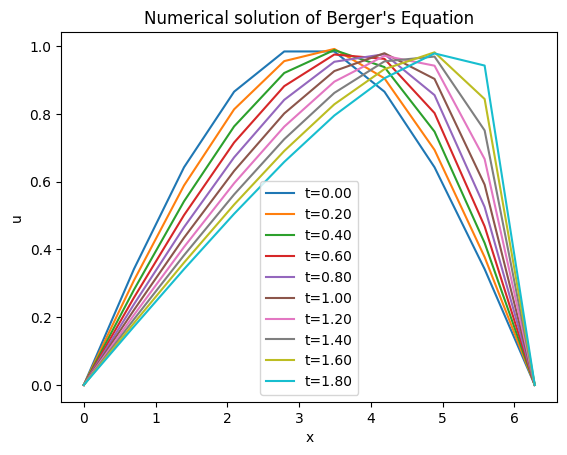

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2 * np.pi  # Length of domain
Nx = 10       # Number of spatial grid points
Nt = 200       # Number of time steps
nu = 0.1       # Viscosity
T = 2          # Total time
dt = T / Nt    # Time step
dx = L / Nx    # Spatial step

# Initial condition
x = np.linspace(0, L, Nx)
u0 = np.sin(x * np.pi / L)

# Initialize solution array
u = np.zeros((Nt, Nx))

# Set initial condition
u[0] = u0

# RK4 method
for n in range(Nt - 1):
    k1 = np.zeros(Nx)
    k2 = np.zeros(Nx)
    k3 = np.zeros(Nx)
    k4 = np.zeros(Nx)
    
    for i in range(1, Nx - 1):
        k1[i] = -0.5 * (u[n, i + 1] - u[n, i - 1]) / dx * u[n, i] + nu * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / dx**2
    for i in range(1, Nx - 1):
        k2[i] = -0.5 * (u[n, i + 1] - u[n, i - 1]) / dx * (u[n, i] + 0.5 * dt * k1[i]) + nu * (u[n, i + 1] - 2 * (u[n, i] + 0.5 * dt * k1[i]) + u[n, i - 1]) / dx**2
    for i in range(1, Nx - 1):
        k3[i] = -0.5 * (u[n, i + 1] - u[n, i - 1]) / dx * (u[n, i] + 0.5 * dt * k2[i]) + nu * (u[n, i + 1] - 2 * (u[n, i] + 0.5 * dt * k2[i]) + u[n, i - 1]) / dx**2
    for i in range(1, Nx - 1):
        k4[i] = -0.5 * (u[n, i + 1] - u[n, i - 1]) / dx * (u[n, i] + dt * k3[i]) + nu * (u[n, i + 1] - 2 * (u[n, i] + dt * k3[i]) + u[n, i - 1]) / dx**2
    
    u[n + 1, 1:-1] = u[n, 1:-1] + dt / 6 * (k1[1:-1] + 2 * k2[1:-1] + 2 * k3[1:-1] + k4[1:-1])

    if n % 20 == 0:
        print(f"Time {n * dt:.3f}: {u[n]}")

    if n % 20 == 0:
        plt.plot(x, u[n], label=f't={n*dt:.2f}')

plt.title('Numerical solution of Berger\'s Equation')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()
